In [880]:
import pandas as pd
import numpy as np
import math 

import matplotlib.pyplot as plt

 # Set Parameters

In [881]:
# PCB Parameters
outer_diameter = 110e-3
outer_radius = outer_diameter/2
inner_diameter = 30e-3
inner_radius = inner_diameter/2
coils = 12

# Coil Parameters

coil_spacing = 1e-3
inner_spacing = 5e-3
outer_spacing = 5e-3
angular_spacing = 4
# Accounts for the additional space provided as the radius of the disc increases
radius_fill_factor = 1.04
mid_point_y = inner_radius + (outer_radius-inner_radius)/2
perim_angle = math.radians(360/coils * 1/2 - angular_spacing/2)
half_width = mid_point_y * math.tan(perim_angle) * radius_fill_factor
turns = 6
thickness = 1.0e-3
clearance = 0.2e-3
spacing = thickness + clearance
inner_width = (inner_radius + inner_spacing) * math.tan(perim_angle)
distance_mid_to_outer = (outer_radius - outer_spacing) - mid_point_y
outer_width = half_width - distance_mid_to_outer * math.tan(math.radians(8))

# Accounts for spacing of corners being based on x & y, but shortest distance being the hypotonuse. Reduces x and y slightly. 
corner_fill_factor = 0.9

# Create Template & Coil

In [882]:
hexagon = []
# Bottom Left Corner
hexagon.append((-inner_width, inner_radius + inner_spacing))
# Widest Point Negative
hexagon.append((-half_width, mid_point_y))
# Top Corners 
hexagon.append((-outer_width, outer_radius - outer_spacing))
hexagon.append((outer_width, outer_radius - outer_spacing))
# Widest Point Positive
hexagon.append((half_width, mid_point_y))
hexagon.append((inner_width, inner_radius + inner_spacing))

template = hexagon

coil = []
for pt in hexagon:
    coil.append(pt)

for turn in range(turns-1):
    pts = [None] * 6

    # Bottom Left Corner
    if turn == 0:
        pts[0] = (hexagon[0][0] + spacing, hexagon[0][1])
    else: 
        pts[0] = (hexagon[0][0] + (spacing * corner_fill_factor), hexagon[0][1] + spacing)
    # Widest Point Negative
    pts[1] = (hexagon[1][0] + spacing, hexagon[1][1])
    # Top Corners
    pts[2] = (hexagon[2][0] + (spacing * corner_fill_factor), hexagon[2][1] - spacing)
    pts[3] = (hexagon[3][0] - (spacing * corner_fill_factor), hexagon[3][1] - spacing)
    # Widest Point Positive
    pts[4] = (hexagon[4][0] - spacing, hexagon[4][1])
    # Bottom Right Corner
    pts[5] = (hexagon[5][0] - (spacing * corner_fill_factor), hexagon[5][1] + spacing)

    
    # Modify this line to add the new hexagon (pts) to the coil
    for pt in pts:
        coil.append(pt)
    hexagon = pts  # Update the hexagon for the next iteration



# Plot Template

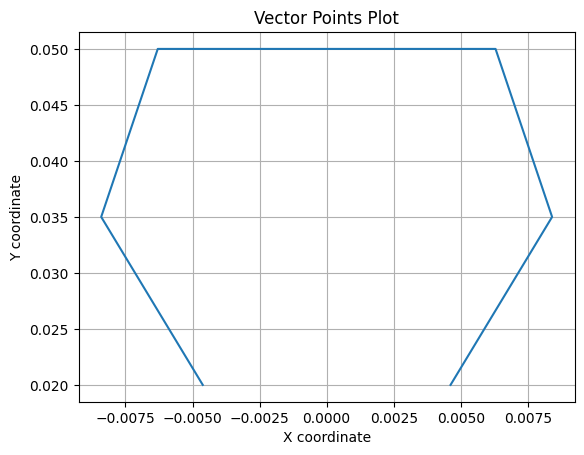

In [883]:
# Extracting X and Y coordinates
x_coords = [point[0] for point in template]
y_coords = [point[1] for point in template]

# Plotting the points
plt.plot(x_coords, y_coords)

# Optionally, you can customize your plot (like adding a title, labels, etc.)
plt.title("Vector Points Plot")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.grid()

# Display the plot
plt.show()

# Plot Coil

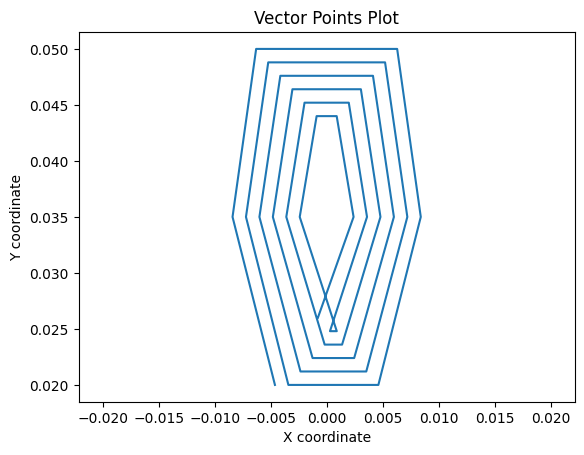

In [884]:
# Extracting X and Y coordinates
x_coords = [point[0] for point in coil]
y_coords = [point[1] for point in coil]

# Plotting the points
plt.plot(x_coords, y_coords)

# Optionally, you can customize your plot (like adding a title, labels, etc.)
plt.title("Vector Points Plot")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.axis("equal")

# Display the plot
plt.show()

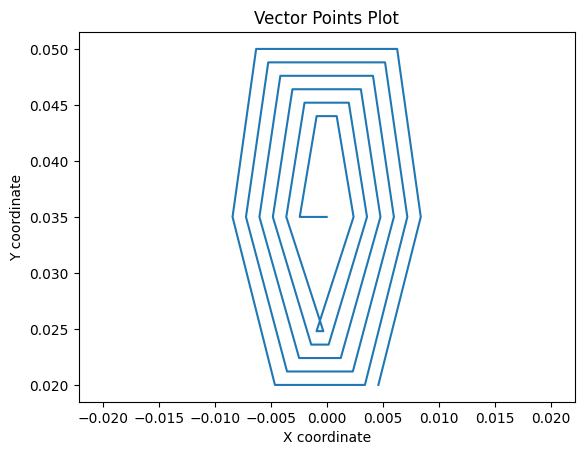

In [885]:
# Create lead to via
coil[-1] = ((0, mid_point_y))
flip_matrix = np.array([[-1, 0], [0, 1]])
flipped_coil = np.array(coil)
flipped_coil = [flip_matrix @ np.array(point) for point in flipped_coil]

# Extracting X and Y coordinates
flipped_coil = np.array(flipped_coil)
x_coords = flipped_coil[:,0]
y_coords = flipped_coil[:,1]

# Plotting the points
plt.plot(x_coords, y_coords)

# Optionally, you can customize your plot (like adding a title, labels, etc.)
plt.title("Vector Points Plot")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.axis("equal")

# Display the plot
plt.show()

# Create rest of the coils

[array([-0.01399875,  0.01501183]), array([-0.02477773,  0.02610909]), array([-0.03045205,  0.04015353]), array([-0.01954795,  0.04644902]), array([-0.01022227,  0.03451269]), array([-0.00600125,  0.01962919]), array([-0.01313273,  0.01551183]), array([-0.02391171,  0.02660909]), array([-0.02917263,  0.0397375 ]), array([-0.01982737,  0.04513299]), array([-0.01108829,  0.03401269]), array([-0.00728067,  0.02004522]), array([-0.01285331,  0.01682785]), array([-0.02304568,  0.02710909]), array([-0.02789321,  0.03932147]), array([-0.02010679,  0.04381696]), array([-0.01195432,  0.03351269]), array([-0.00856009,  0.02046124]), array([-0.01257388,  0.01814388]), array([-0.02217966,  0.02760909]), array([-0.02661379,  0.03890545]), array([-0.02038621,  0.04250094]), array([-0.01282034,  0.03301269]), array([-0.00983951,  0.02087727]), array([-0.01229446,  0.0194599 ]), array([-0.02131363,  0.02810909]), array([-0.02533436,  0.03848942]), array([-0.02066564,  0.04118491]), array([-0.01368637,

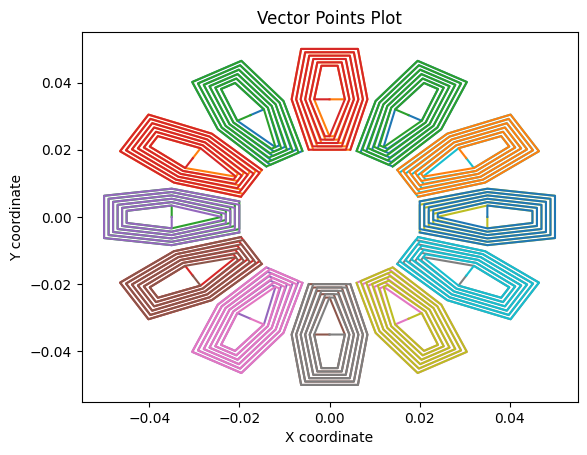

In [879]:
# Rotating Points
coil_angle = math.radians(360/coils)
c, s = np.cos(coil_angle), np.sin(coil_angle)
rot_matrix = np.array([[c, -s], [s, c]])

coil = np.array(coil)
all_coils = []
all_flipped_coils = []

for i in range(coils):
    rotated_points = [rot_matrix @ np.array(point) for point in coil]
    all_coils.append(rotated_points)
    coil = rotated_points

for i in range(coils):
    rotated_points = [rot_matrix @ np.array(point) for point in flipped_coil]
    all_flipped_coils.append(rotated_points)
    flipped_coil = rotated_points

for coil in all_coils:
    print(coil)
    coil_array = np.array(coil)
    print(coil_array)
    x_coords = coil_array[:,0]
    y_coords = coil_array[:,1]
    plt.plot(x_coords, y_coords)

for coil in all_flipped_coils:
    print(coil)
    coil_array = np.array(coil)
    print(coil_array)
    x_coords = coil_array[:,0]
    y_coords = coil_array[:,1]
    plt.plot(x_coords, y_coords)

# Optionally, you can customize your plot (like adding a title, labels, etc.)
plt.title("Vector Points Plot")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")

# Display the plot
plt.show()

In [871]:
import ezdxf

# Assuming 'coil' and 'coils' are defined and new_coils is populated

# Create a new DXF document
doc = ezdxf.new('R2010') 
msp = doc.modelspace()

# Loop through each coil and add as a separate polyline
for coil_set in all_coils:
    # Create a 2D polyline
    polyline = msp.add_lwpolyline(coil_set, format='xy')

# Save the DXF file
doc.saveas("front_coils.dxf")

In [872]:
# Create a new DXF document
doc = ezdxf.new('R2010') 
msp = doc.modelspace()

# Loop through each coil and add as a separate polyline
for coil_set in all_flipped_coils:
    # Create a 2D polyline
    polyline = msp.add_lwpolyline(coil_set, format='xy')

# Save the DXF file
doc.saveas("back_coils.dxf")

# Add to PCB File

In [ ]:
import pcbnew

new_pcb = pcbnew.BOARD()
new_pcb.save("motor.kicad_pcb")